# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [4]:
# Libraries
import numpy as np
from matplotlib import pyplot as plt
from math import e
import pandas as pd
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

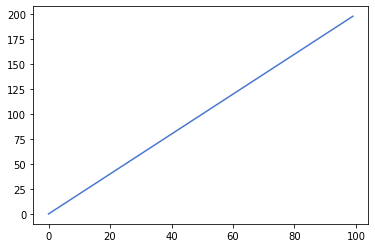

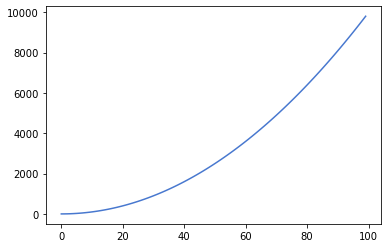

In [4]:
plt.style.use('seaborn-muted')
plot= plt.plot(x,y,'-')
plt.show(plot)

plot= plt.plot(x,z,'-')
plt.show(plot)

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

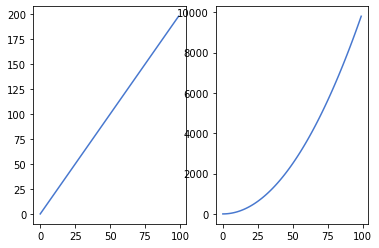

In [5]:
fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].plot(x,y)
ax[1].plot(x,z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

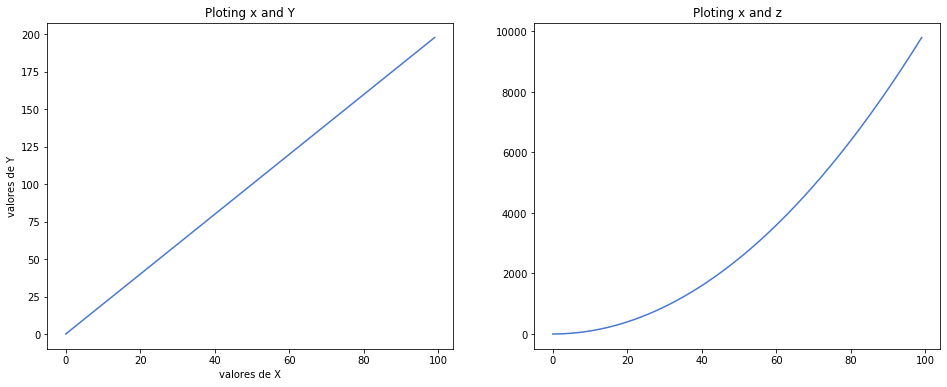

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(16,6))
ax[0].set_title('Ploting x and Y')
ax[0].set(xlabel='valores de X',
          ylabel='valores de Y',
          title='Ploting x and Y')
ax[0].plot(x,y)

ax[1].set_title('Ploting x and z')
ax[1].plot(x,z)

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

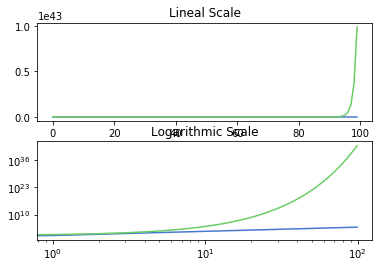

In [7]:
y = x**2
y2 = e**x


fig,(ax1,ax2) = plt.subplots(2,1)

ax1.plot(x,y)
ax1.plot(x,y2)
ax1.set(title='Lineal Scale')

ax2.plot(x,y, label='x**2')
ax2.plot(x,y2,label='e**x')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set(title = 'Logarithmic Scale');

#### As a bonus challenge, try to add a legend to the plot.

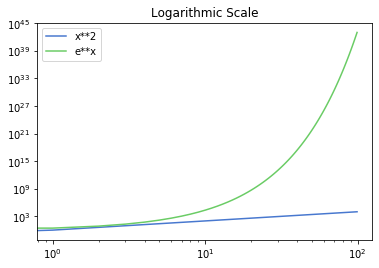

In [8]:
fig,ax2 = plt.subplots()

ax2.plot(x,y, label='x**2')
ax2.plot(x,y2,label='e**x')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set(title = 'Logarithmic Scale')
ax2.legend();

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
fit_df = pd.read_csv('../data/fitbit2.csv')
fit_df.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [10]:
fit_df.groupby(['Work_or_Weekend']).median().reset_index()[['Steps']]

,Steps
0,9998.0
1,10445.5


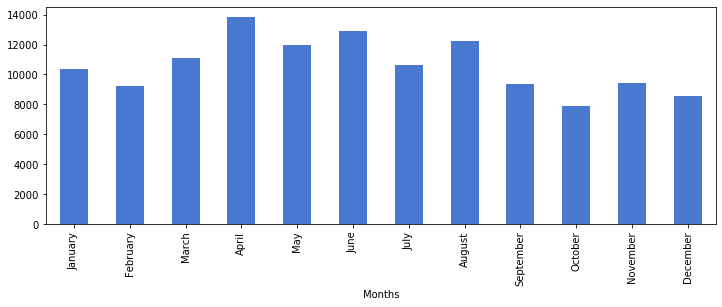

In [11]:
# MEDIAN STEPS BY MONTH_ENCODED
graph_1 = fit_df.groupby(['Months_encoded','Months']).median().reset_index()[['Months_encoded','Months','Steps']]
graph_1.set_index('Months')['Steps'].plot(kind='bar',figsize=(12,4));

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

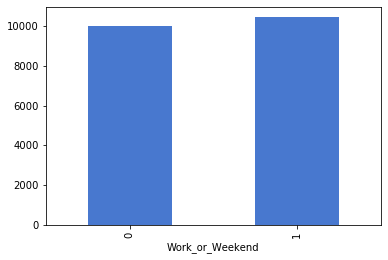

In [12]:
# MEDIAN STEPS BY WORK_OR_WEEKEND
graph2 = fit_df.groupby(['Work_or_Weekend']).median()['Steps'].plot(kind='bar')
fit_df.columns

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

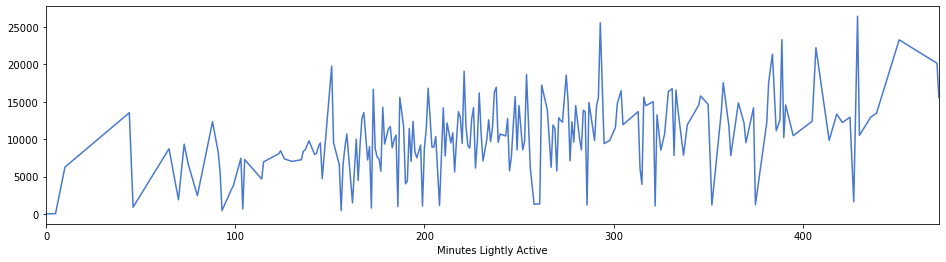

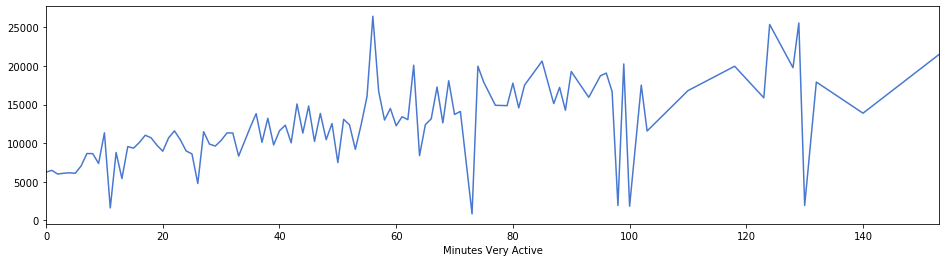

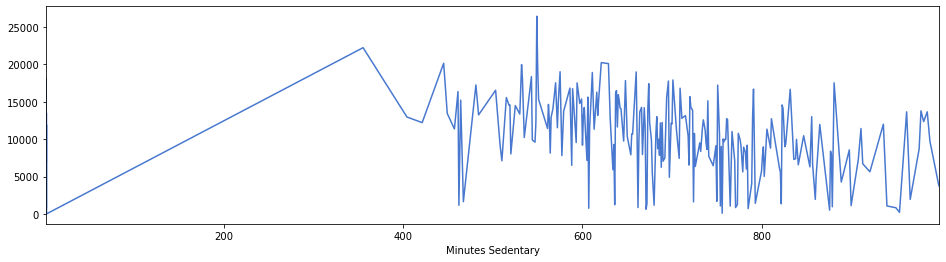

In [25]:
list_of_plots = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

for plot in list_of_plots:
    plt.figure(figsize=(16,4))
    fit_df.groupby(plot).median()['Steps'].plot();

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [7]:
titanic_df = pd.read_csv('../data/titanic.csv')


#### Explore the titanic dataset using Pandas dtypes.

In [37]:
titanic_df.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [43]:
# NUMERICAL VARIABLES
titanic_df.select_dtypes(include=['int','float']).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [44]:
# CATEGORICAL VARIABLES
titanic_df.select_dtypes(exclude=['int','float']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [116]:
sns.set_style("white")
sns.set(rc={'figure.figsize':(12,6)})

#### Use the right visulalization to show the distribution of column `Age`.

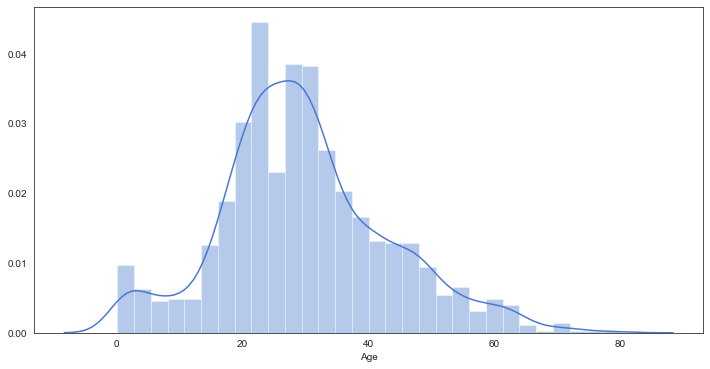

In [61]:
plt.figure(figsize=(12,6))
sns.distplot(titanic_df['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

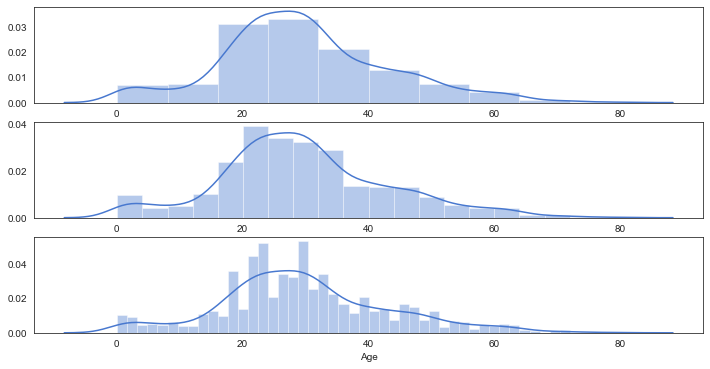

In [69]:
f, axes = plt.subplots(3, 1, figsize=(12, 6))
sns.distplot(titanic_df['Age'],bins=10, ax=axes[0])
sns.distplot(titanic_df['Age'],bins=20, ax=axes[1])
sns.distplot(titanic_df['Age'],bins=50, ax=axes[2])


#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

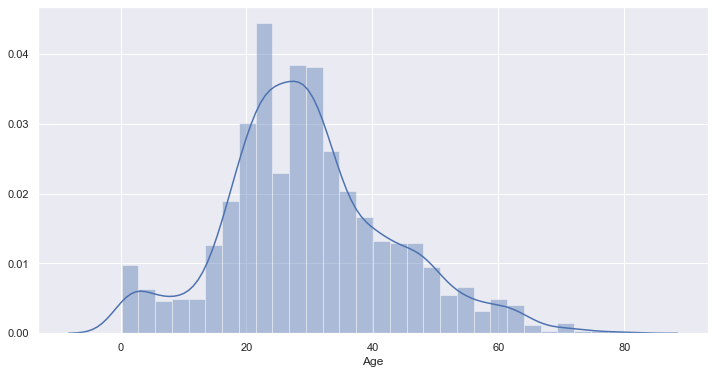

In [117]:
sns.distplot(titanic_df['Age'],hist=True)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

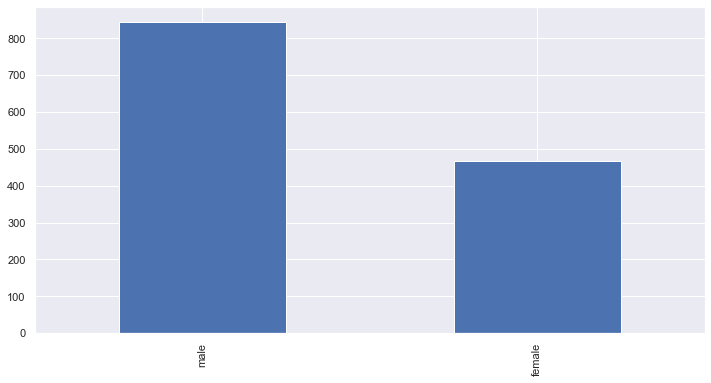

In [119]:
# Method 1 - matplotlib
fig = plt.figure()
data = titanic_df['Gender'].value_counts()
data.plot(kind='bar');


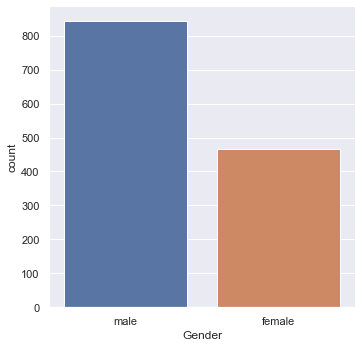

In [122]:
# Method 2 - seaborny
sns.catplot(x ='Gender', kind='count', data= titanic_df);

#### Use the right plot to visualize the column `Pclass`.

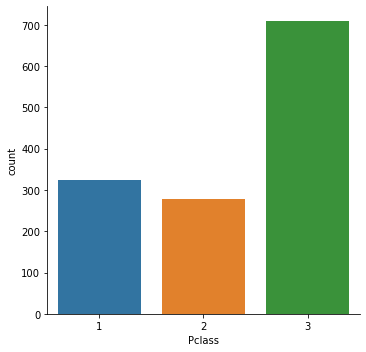

In [8]:
sns.catplot(x ='Pclass', kind='count', data= titanic_df);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

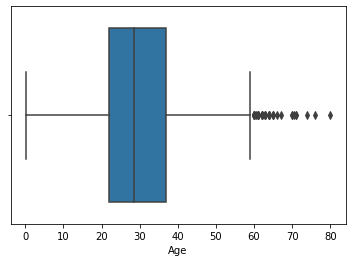

In [14]:
sns.boxplot(x=titanic_df['Age'])

"""
we use box plot because in one single plot we can see minimum, max, median, distribution...
"""

#### What does the last plot tell you about the feature `Age`?

In [42]:
"""
most of passengers are between 20 and 38.
The mean of the age is 30
the are also some few values above 60 and below 80 year old
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

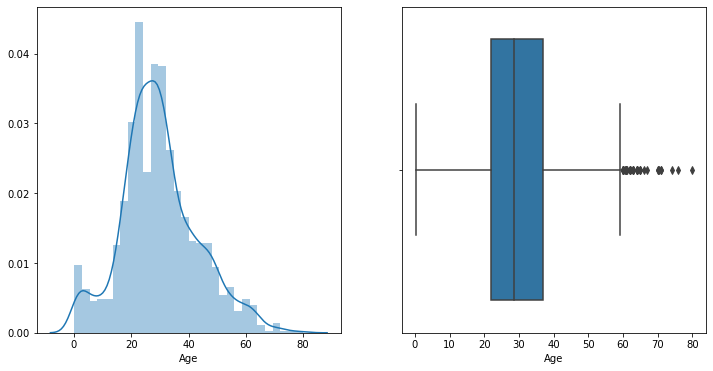

In [59]:
#No encontré la manera de hacer un solo gráfico con la información de las estadísiticas y la distribución. ¿Cómo se realizaría?



fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12, 6))
sns.distplot(titanic_df['Age'],ax=ax1)
sns.boxplot(titanic_df['Age'],ax=ax2);

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
most of passengers are between 20 an 40 years buy there are very few passangers with 25 years old.
there are some values abobe 60 and the oldest passaanger is 80 years
there are also more babes than teens.

"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

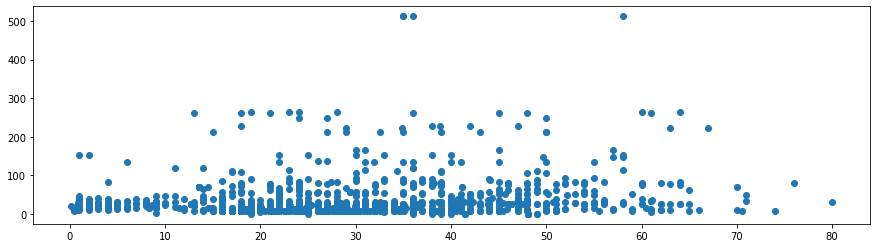

In [30]:
# Method 1 - matplotlib
plt.figure(figsize=(15,4))
plt.scatter(x=titanic_df['Age'],y=titanic_df['Fare']);


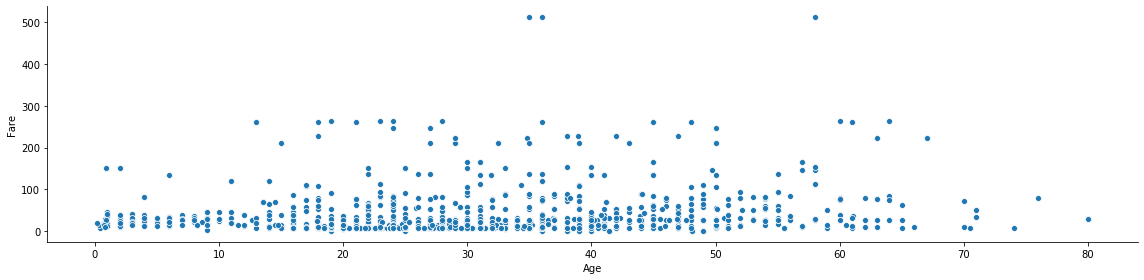

In [38]:
# Method 2 - seaborn
sns.relplot(x="Age", y="Fare", data=titanic_df, height=4, aspect=4); 

#### Plot the correlation matrix using seaborn.

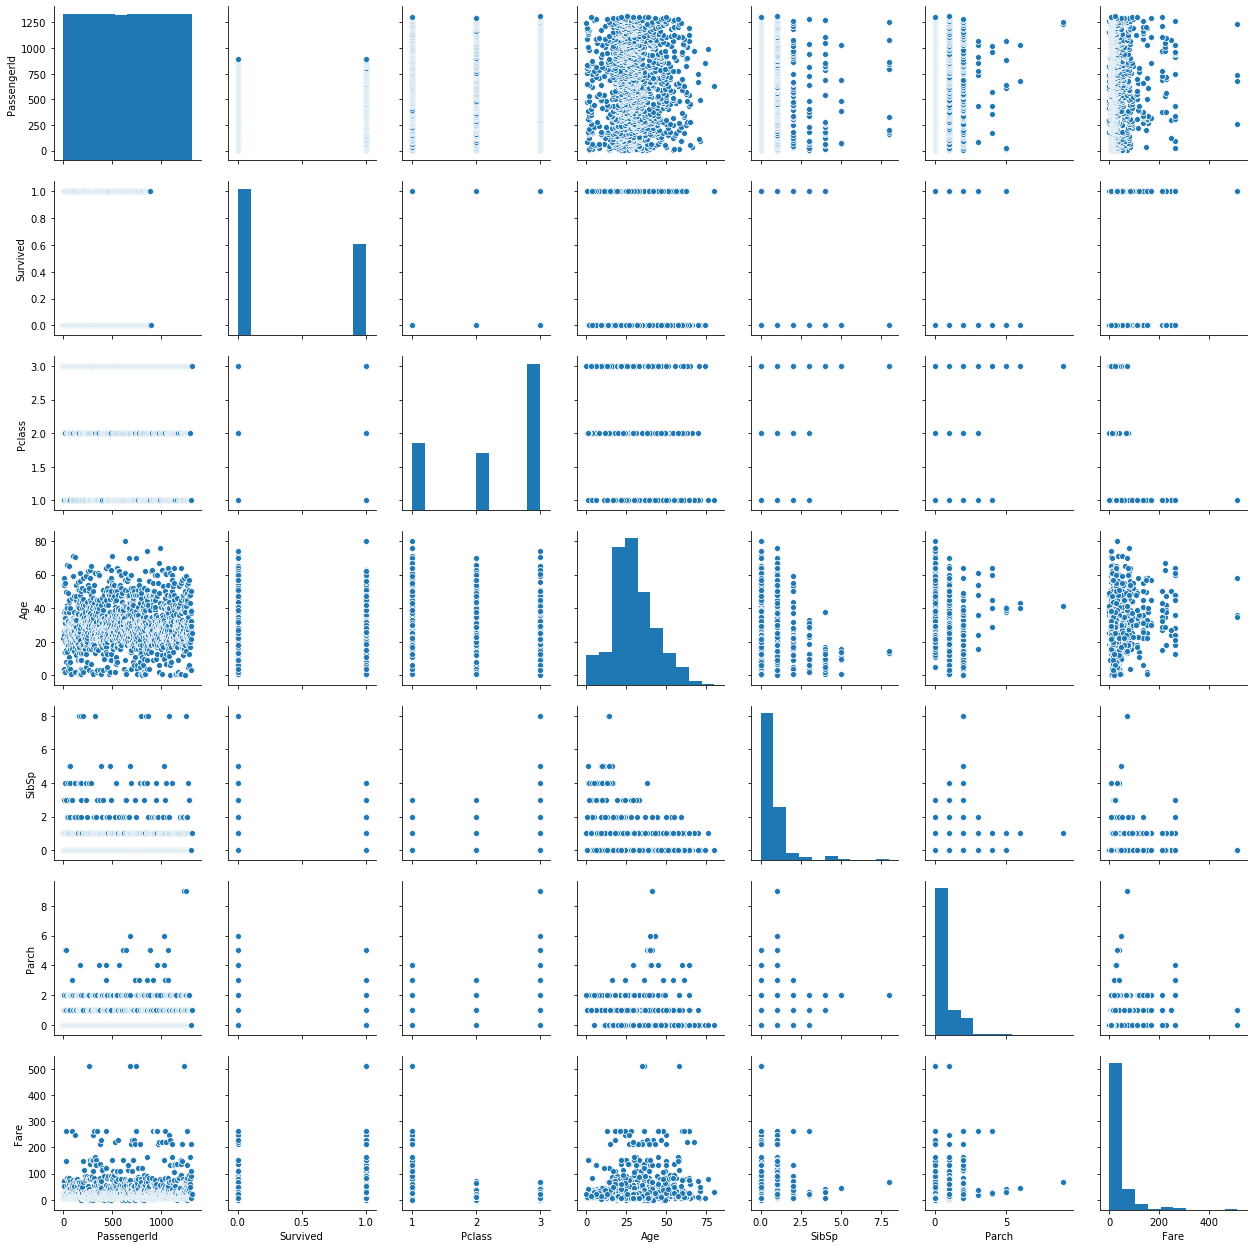

In [61]:
sns.pairplot(titanic_df)

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

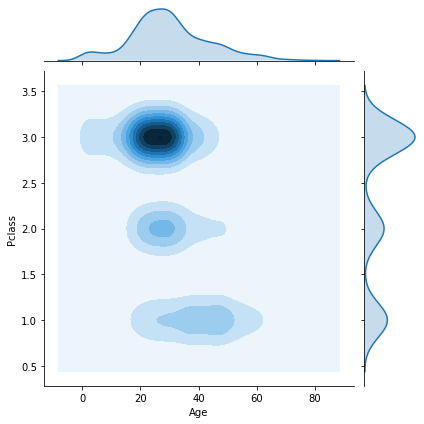

In [19]:
sns.jointplot(x ='Age', y ='Pclass', data = titanic_df, kind ='kde')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

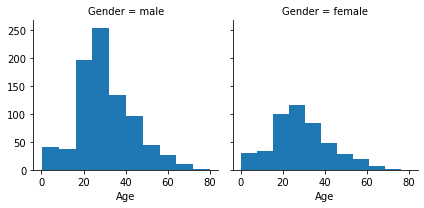

In [23]:
g = sns.FacetGrid(data=titanic_df,col='Gender')
g.map(plt.hist,'Age')